<a href="https://colab.research.google.com/github/HEANGLyheng1/Construction-mechanic-homework-3/blob/main/Construction_mechanic_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CONSTRUCTION MECHANIC HOMEWORK**


**Group**

*	**HEANG Lyheng e20180257**
*	**HOEM Rachhat e20180300**
* **KHENG Vutra e20180401**
* **KOU Somvisit e20180457**

**HW Excercise** (100 pts): 

Tasks:

1. Develop kinematic model of the robot.
2. Solve forward kinematics problem.
3. Solve inverse kinematics problem.
4. Upload your project to github.
5. Write a report.

Remark: report (75pts), code (25pts)

Requirements:
1. Use Matlab / Python for implementation.
2. Both FK and IK should be implemented as distinct files.
3. IK function should take into account singularities, workspace limits and
possibility of multiple solutions.
4. You code should contain file with example of the usage of FK and IK
functions.
5. You code should contain file with tests.
6. Report should be of following structure:
Description of the robot.

*   Kinematic scheme with description of the parameters.
*   Step by step explanation of inverse kinematics solution.

Robots: KUKA KR 10 R1100-2.


**Answer**

robot

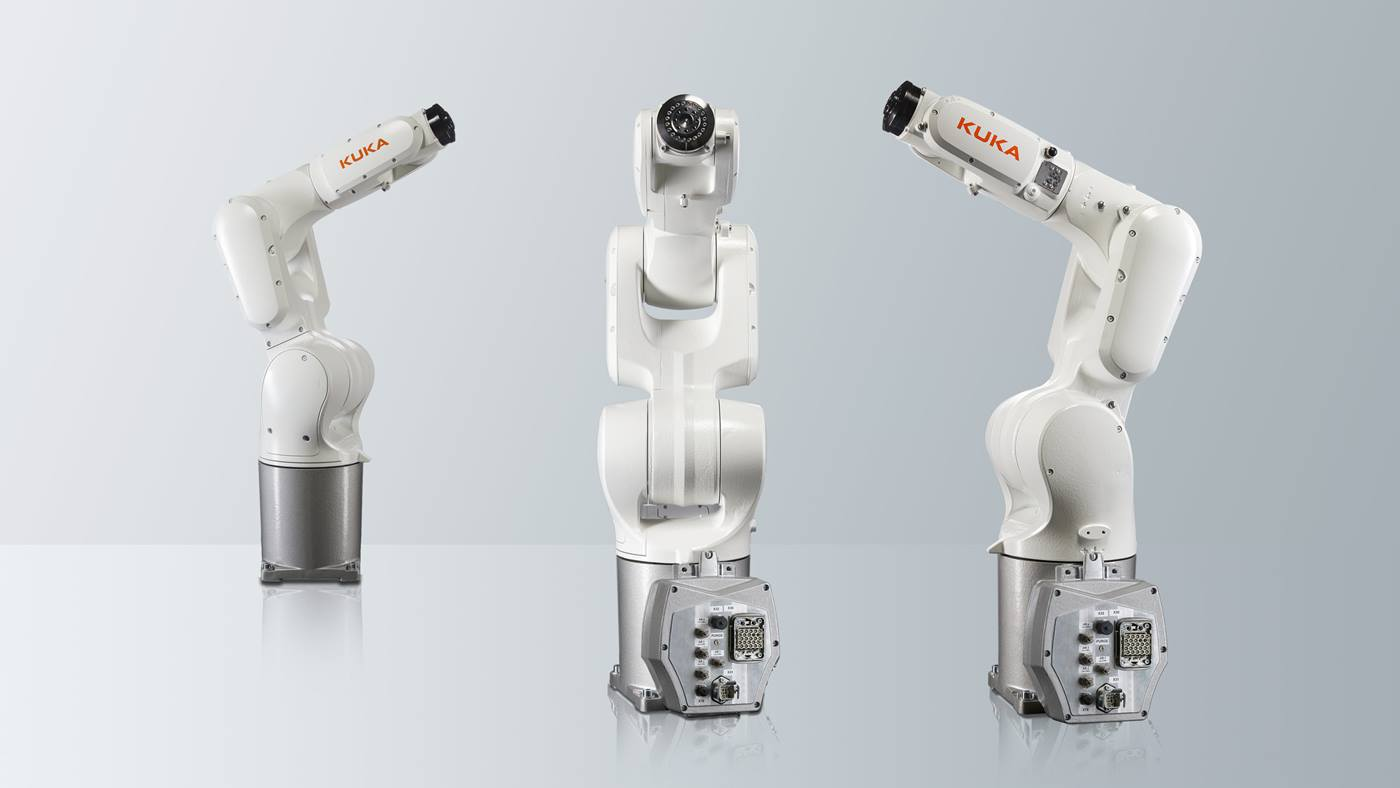

1. Forward kinematic


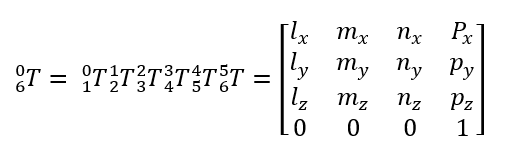

In [52]:
import numpy as np
def D_H_P(theta_i,alpha_i,a_i,d_i):
  T=np.array([[np.cos(theta_i), -np.sin(theta_i)*np.cos(alpha_i), np.sin(theta_i)*np.sin(alpha_i), a_i*np.cos(theta_i)],
              [np.sin(theta_i), np.cos(theta_i)*np.cos(alpha_i), -np.cos(theta_i)*np.sin(alpha_i), a_i*np.sin(theta_i)],
              [0, np.sin(alpha_i), np.cos(alpha_i), d_i],
              [0, 0, 0, 1]])
  return T


In [53]:
T1 = D_H_P(np.pi/3,np.pi/2,2,3)
T2 = D_H_P(np.pi/3,0,2,0)
T3 = D_H_P(np.pi/4-np.pi/2,np.pi/2,1,0)
T4 = D_H_P(np.pi/4,-np.pi/2,0,1)
T5 = D_H_P(np.pi/3,np.pi/2,0,0)
T6 = D_H_P(np.pi/3+np.pi,0,0,2)

T1_6 = np.dot(np.dot(np.dot(np.dot(np.dot(T1,T2),T3),T4),T5),T6)

T1_6

array([[-0.41701064,  0.18055145,  0.89078802,  3.89394848],
       [ 0.85601465,  0.40745862,  0.31814524,  4.29502687],
       [-0.30551768,  0.89519755, -0.32446926,  3.3760055 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

2. Inverse kinematic of the robot

In [62]:
import numpy as np
def IK(lx,ly,lz,mx,my,mz,nx,ny,nz,px,py,pz,a1,a2,d3,t_1,t_2,t_3,t_4):
  theta_1 = np.arccos((px*(a2*np.cos(t_2)+a1)-py*d3)/px**2+py**2)
  theta_2 = np.arcsin(pz/a2)
  theta_3 = np.arccos((pz**2-a2**2+(px*np.cos(t_1)+py*np.sin(t_1)-a1)**2)/2*pz**2)-np.arcsin(pz/a1)
  theta_4 = np.arctan((nx*np.sin(t_1)-ny*np.cos(t_1))/nx*np.cos(t_1)*np.cos(t_2+t_3)+ny*np.sin(t_1)*np.sin(t_2+t_3)+nz*np.sin(t_2+t_3))
  theta_5 = - np.arctan((nz*np.cos(t_1)*np.cos(t_2+t_3)*np.cos(t_4)+ny*np.sin(t_1)*np.sin(t_2+t_3)*np.cos(t_4)+nz*np.sin(t_1)*np.sin(t_4)-ny*np.cos(t_1)*np.sin(t_4))/-nz*np.sin(t_2+t_3)-ny*np.sin(t_1)*np.sin(t_2+t_3)+nz*np.cos(t_2+t_3))
  theta_6 = np.arctan((mz*np.cos(t_2+t_3)-mx*np.cos(t_1)*np.sin(t_2+t_3)-my*np.sin(t_1)*np.sin(t_2+t_3))/lx*np.cos(t_1)*np.sin(t_2+t_3)+ly*np.sin(t_1)*np.sin(t_2+t_3)-lz*np.cos(t_2+t_3))

  return theta_1,theta_2,theta_3,theta_4,theta_5,theta_6

In [66]:
theta_1,theta_2,theta_3,theta_4,theta_5,theta_6 = IK(-0.4,0.8,-0.3,0.1,0.4,0.8,0.8,0.3,-0.3,3.8,4.2,3.3,2,2,0,np.pi/3,np.pi/3,np.pi/4-np.pi/2,np.pi/4)
print(theta_1)
print(theta_2)
print(theta_3)
print(theta_4)
print(theta_5)
print(theta_6)

nan
nan
nan
0.30725187438607937
0.5794538049716407
0.24712893799470306


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arccos
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arcsin
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in arccos
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in arcsin
  """
